<a href="https://colab.research.google.com/github/haalogen/IFA-cloud-nnregressor/blob/master/IFA_regressor__test_regularization_reproducability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use seaborn for pairplot
!pip install seaborn

In [2]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', 500)
tf.random.set_random_seed(12345678)
print(tf.__version__)

1.13.1


In [0]:
# Скачиваем данные
data_url_v180221 = 'https://gist.githubusercontent.com/haalogen/0ec5e1b7ae515391484d7883ecb9313c/raw/2fafa96369d496214f2b231966bcd2f82f691658/180221_lutData.tsv'
data_url_v190212 = 'https://gist.githubusercontent.com/haalogen/c53f1a2ea432bbe251dbe50c73437d00/raw/32976b13283b5b2f9b68e96c3c766781b5f8b355/190212_lutData.tsv'
raw_dataset = pd.read_csv(data_url_v190212, sep='\t')

In [4]:
column_names = raw_dataset.columns
print(column_names)

dataset = raw_dataset.copy()

# Выкинем ненужные данные
dropped_columns = [
  'cloudThick_km', 
  'relativeCloudConc', 
  'intensityError_340nm',
  'intensityError_350nm',
  'intensityError_369nm',
  'intensityError_379nm',
  'intensityError_425nm',
  'intensityError_435nm',
  'intensityError_475nm',
  'intensityError_485nm'
]
dataset = dataset.drop(columns=dropped_columns)
dataset.tail()

Index(['albedo', 'sza_deg', 'intensity_345nm', 'intensity_374nm',
       'intensity_430nm', 'intensity_480nm', 'intensityError_340nm',
       'intensityError_350nm', 'intensityError_369nm', 'intensityError_379nm',
       'intensityError_425nm', 'intensityError_435nm', 'intensityError_475nm',
       'intensityError_485nm', 'O4SCD_340nm', 'O4SCD_350nm', 'O4SCD_369nm',
       'O4SCD_379nm', 'O4SCD_425nm', 'O4SCD_435nm', 'O4SCD_475nm',
       'O4SCD_485nm', 'ci_uv', 'ci_vis', 'pc_uv', 'pc_vis', 'aod', 'cloudOD',
       'cloudBaseHeight_km', 'cloudThick_km', 'relativeCloudConc',
       'FSummer_340', 'FWinter_340', 'FSummer_350', 'FWinter_350',
       'FSummer_369', 'FWinter_369', 'FSummer_379', 'FWinter_379',
       'FSummer_425', 'FWinter_425', 'FSummer_435', 'FWinter_435',
       'FSummer_475', 'FWinter_475', 'FSummer_485', 'FWinter_485'],
      dtype='object')


,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,aod,cloudOD,cloudBaseHeight_km,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
2725,0.34,84,0.076304,0.105087,0.170608,0.231962,2.960000e+24,3.030000e+24,3.130000e+24,3.180000e+24,3.500000e+24,3.560000e+24,3.910000e+24,3.940000e+24,1.377205,1.359621,0.000992,0.001227,1.07,25.6,3.2,0.150491,0.150491,0.151428,0.151428,0.150126,0.150126,0.150930,0.150930,0.142893,0.142893,0.142300,0.142300,0.133084,0.133084,0.133534,0.133534
2726,0.34,84,0.011126,0.018397,0.035423,0.046985,3.770000e+24,4.000000e+24,4.080000e+24,4.130000e+24,4.060000e+24,4.180000e+24,4.470000e+24,4.490000e+24,1.653473,1.326414,0.000251,0.000231,1.07,51.2,0.4,0.107817,0.107817,0.110748,0.110748,0.113075,0.113075,0.116472,0.116472,0.115144,0.115144,0.112117,0.112117,0.106114,0.106114,0.104316,0.104316
2727,0.34,84,0.015148,0.023393,0.034444,0.042046,3.560000e+24,3.650000e+24,3.680000e+24,3.730000e+24,4.200000e+24,4.270000e+24,4.570000e+24,4.620000e+24,1.544299,1.220702,0.000284,0.000152,1.07,51.2,0.8,0.132382,0.132382,0.135068,0.135068,0.131413,0.131413,0.133111,0.133111,0.120569,0.120569,0.118135,0.118135,0.112108,0.112108,0.112628,0.112628
2728,0.34,84,0.020639,0.025644,0.034916,0.041120,3.480000e+24,3.530000e+24,3.550000e+24,3.590000e+24,4.080000e+24,4.120000e+24,4.370000e+24,4.400000e+24,1.242480,1.177680,0.000173,0.000124,1.07,51.2,1.6,0.152002,0.152002,0.151934,0.151934,0.149699,0.149699,0.147884,0.147884,0.123310,0.123310,0.124783,0.124783,0.124182,0.124182,0.122586,0.122586
2729,0.34,84,0.023082,0.033262,0.051372,0.066525,3.240000e+24,3.280000e+24,3.290000e+24,3.290000e+24,3.540000e+24,3.590000e+24,3.790000e+24,3.860000e+24,1.441040,1.294958,0.000351,0.000303,1.07,51.2,3.2,0.157644,0.157644,0.158217,0.158217,0.157332,0.157332,0.156157,0.156157,0.148914,0.148914,0.148285,0.148285,0.144840,0.144840,0.143726,0.143726


### Clean the data

The dataset contains a few unknown values. 

In [0]:
dataset = dataset.dropna()

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("aod")
train_stats.pop("cloudOD")
train_stats.pop("cloudBaseHeight_km")
train_stats = train_stats.transpose()
# train_stats

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [0]:
estimated_columns = ['aod', 'cloudOD', "cloudBaseHeight_km"]
train_labels = train_dataset.loc[:, estimated_columns]
test_labels = test_dataset.loc[:, estimated_columns]
# Выкинем оцениваемые колонки из наборов данных
train_dataset = train_dataset.drop(columns=estimated_columns)
test_dataset = test_dataset.drop(columns=estimated_columns)

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

In [0]:
# layers.Dense?

## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [0]:
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation=tf.nn.relu, 
                 kernel_regularizer=keras.regularizers.l1_l2(l1=1e-2, l2=1e-3), 
                 kernel_initializer=keras.initializers.glorot_uniform(seed=12345678),
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(3)
  ])

#   optimizer = tf.train.RMSPropOptimizer(0.001)
  optimizer = tf.train.AdamOptimizer()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [12]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### Inspect the model

Use the `.summary` method to print a simple description of the model

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________


### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [14]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()], shuffle=False)

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

Visualize the model's training progress using the stats stored in the `history` object.

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.971103,0.632930,1.538437,4.026803,0.821969,3.594195,995
996,1.966302,0.631959,1.533675,4.043639,0.822126,3.611079,996
997,1.969935,0.632747,1.537353,4.033738,0.821497,3.601240,997
998,1.965825,0.631817,1.533306,4.050440,0.822675,3.618015,998
999,1.965185,0.632002,1.532719,4.034997,0.822536,3.602565,999


In [0]:
# Save history to file
# hist.to_csv(index=False, path_or_buf='history.csv', header=hist.columns)

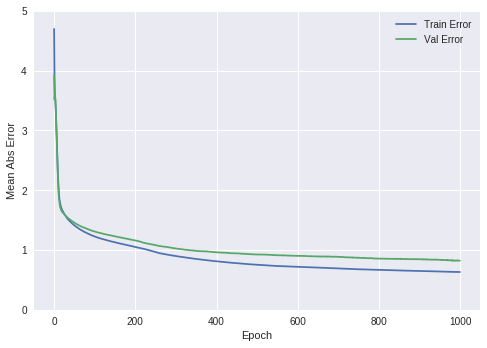

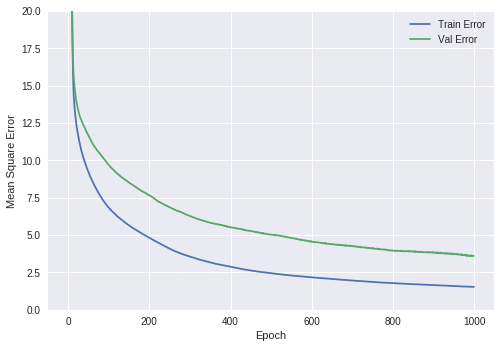

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,20])

plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [0]:
# keras.callbacks.EarlyStopping?

In [0]:
# model = build_model()

# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history)

The graph shows that on the validation set, the average error usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [20]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
print("Testing set Mean Squared Error: {:5.2f} ".format(mse))

Testing set Mean Abs Error:  0.87 
Testing set Mean Squared Error:  3.47 


### Make predictions

Finally, predict MPG values using data in the testing set:

In [21]:
# test_predictions = model.predict(normed_test_data).flatten()
test_predictions = model.predict(normed_test_data)
test_predictions[-5:]

array([[ 0.98268807, 30.026094  ,  0.9945495 ],
       [ 1.0273447 , 40.59034   ,  0.90974283],
       [ 0.6862683 , 48.88192   ,  4.066671  ],
       [ 1.0931904 ,  6.176873  ,  1.5582433 ],
       [ 1.1553512 , 23.830406  ,  2.1548593 ]], dtype=float32)

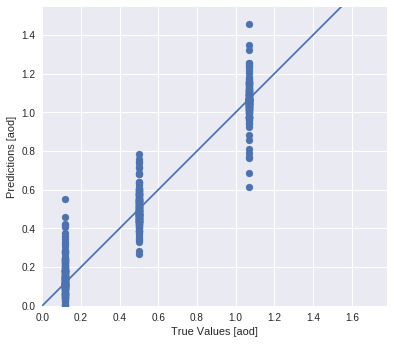

In [22]:
plt.scatter(test_labels['aod'], test_predictions[:, 0])
plt.xlabel('True Values [aod]')
plt.ylabel('Predictions [aod]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [23]:
mse_aod = sum((test_labels['aod'] - test_predictions[:, 0])**2) / len(test_labels['aod'])
print('mse_aod:', mse_aod)

mse_aod: 0.008651590521613987


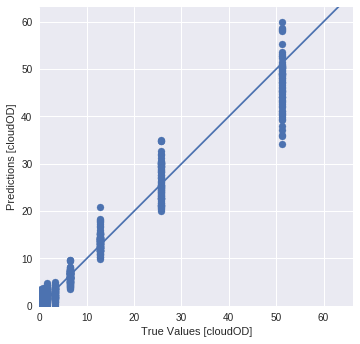

In [24]:
plt.scatter(test_labels['cloudOD'], test_predictions[:, 1])
plt.xlabel('True Values [cloudOD]')
plt.ylabel('Predictions [cloudOD]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [25]:
mse_cloudOD = sum((test_labels['cloudOD'] - test_predictions[:, 1])**2) / len(test_labels['aod'])
print('mse_cloudOD:', mse_cloudOD)

mse_cloudOD: 9.787035361001305


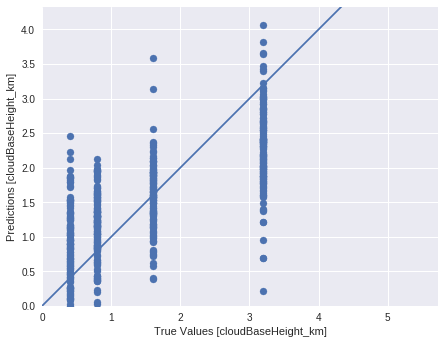

In [26]:
plt.scatter(test_labels['cloudBaseHeight_km'], test_predictions[:, 2])
plt.xlabel('True Values [cloudBaseHeight_km]')
plt.ylabel('Predictions [cloudBaseHeight_km]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [27]:
mse_cloudBaseHeight_km = sum((test_labels['cloudBaseHeight_km'] - test_predictions[:, 2])**2) / len(test_labels['cloudBaseHeight_km'])
print('mse_cloudBaseHeight_km:', mse_cloudBaseHeight_km)

mse_cloudBaseHeight_km: 0.6100437465965122


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

In [28]:
test_labels.tail()

,aod,cloudOD,cloudBaseHeight_km
2707,1.07,25.6,0.8
2711,1.07,51.2,0.8
2713,1.07,51.2,3.2
2716,1.07,6.4,1.6
2725,1.07,25.6,3.2


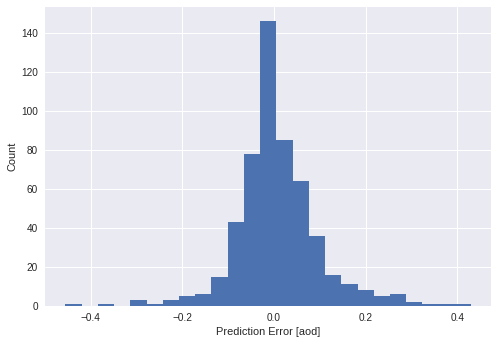

In [29]:
error_aod = test_predictions[:, 0] - test_labels['aod']
plt.hist(error_aod, bins = 25)
plt.xlabel("Prediction Error [aod]")
_ = plt.ylabel("Count")

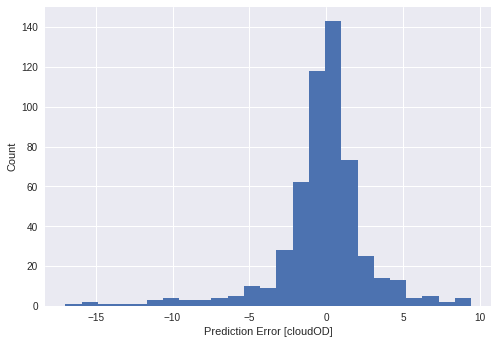

In [30]:
error_cloudOD = test_predictions[:, 1] - test_labels['cloudOD']
plt.hist(error_cloudOD, bins = 25)
plt.xlabel("Prediction Error [cloudOD]")
_ = plt.ylabel("Count")

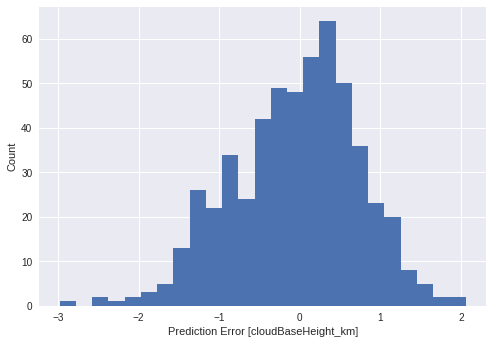

In [31]:
error_cloudOD = test_predictions[:, 2] - test_labels['cloudBaseHeight_km']
plt.hist(error_cloudOD, bins = 25)
plt.xlabel("Prediction Error [cloudBaseHeight_km]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.